<a href="https://colab.research.google.com/github/sc19gs/Hinglish/blob/master/Hinglish_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget --no-check-certificate \
    https://github.com/sc19gs/data/raw/main/data3.csv \
    -O data3.csv

--2021-04-08 07:16:26--  https://github.com/sc19gs/data/raw/main/data3.csv
Resolving github.com (github.com)... 13.114.40.48
Connecting to github.com (github.com)|13.114.40.48|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/sc19gs/data/main/data3.csv [following]
--2021-04-08 07:16:27--  https://raw.githubusercontent.com/sc19gs/data/main/data3.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1239683 (1.2M) [text/plain]
Saving to: ‘data3.csv’

data3.csv           100%[===================>]   1.18M  --.-KB/s    in 0.08s   

2021-04-08 07:16:28 (15.0 MB/s) - ‘data3.csv’ saved [1239683/1239683]



In [ ]:
import pandas as pd
df = pd.read_csv("data3.csv")

In [ ]:
df[df['Tweet'].isnull()]

,ID,Tweet,Sentiment Polarity
70,15581,NaN,neutral
635,42081,NaN,neutral
1199,43574,NaN,neutral
1912,42731,NaN,neutral
2634,9127,NaN,neutral
3034,35448,NaN,neutral
9116,2600,NaN,neutral
13193,11567,NaN,neutral
15978,4692,NaN,neutral


In [ ]:
for i in range(len(df)):
    if(type(df['Tweet'][i]) !=str):
        df['Tweet'][i] = df['Sentiment Polarity'][i]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df[df['Tweet'].isnull()]

,ID,Tweet,Sentiment Polarity


In [ ]:
from gensim.models import Word2Vec
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, Conv1D, MaxPooling1D
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from keras.callbacks import Callback

In [ ]:
def show_results(): # plot performance over the training epochs

  epochs       = range(len(f1scores_test))
  nb_epochs    = len(epochs)

  f2 = plt.figure(2)
  plt.figure(figsize = (30,10))


  plt.plot(epochs, f1scores_test, label='Test F1 scores')
  plt.plot(epochs, f1scores_train, label='Train F1 scores')

  plt.title('Training and Test F1 scores')
  plt.xlabel('Epochs')
  plt.ylabel('F1 scores')
  plt.legend()
 
  plt.draw()
  plt.pause(0.001)


In [ ]:
def show_results1(nn_model_train): # plot performance over the training epochs
  accuracy     = nn_model_train.history['accuracy']
  val_accuracy = nn_model_train.history['val_accuracy']
  loss         = nn_model_train.history['loss']
  val_loss     = nn_model_train.history['val_loss']
  epochs       = range(len(accuracy))
  nb_epochs    = len(epochs)

  f2 = plt.figure(2)
  plt.figure(figsize = (30,10))

  plt.subplot(2,1,1)
  # plt.axis((0,nb_epochs,0.4,0.8))
  plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
  plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
  plt.title('Training and validation accuracy')
  plt.legend()
  plt.subplot(2,1,2)
  # plt.axis((0,nb_epochs,0.8,1.0))
  plt.plot(epochs, loss, 'bo', label='Training loss')
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()
  # plt.savefig('/Users/gaurav/Desktop/Hinglish/data/EX-6'+s+'.png',bbox_inches='tight')
  plt.draw()
  plt.pause(0.001)

In [ ]:
def f1score_train():
  y_pred = model.predict(X_train1)
  y_pred = np.argmax(np.round(y_pred),axis=1) # Choose the prediction with the highest probability
  y_pred_one_hot = to_categorical(y_pred)
  f1 =  f1_score(y_train, y_pred_one_hot, average='macro')
  print("F1-Score trian = ", f1)
  return f1
  
def f1score_test():
  y_pred = model.predict(X_test1)
  y_pred = np.argmax(np.round(y_pred),axis=1) # Choose the prediction with the highest probability
  y_pred_one_hot = to_categorical(y_pred)
  f1 =  f1_score(y_test, y_pred_one_hot, average='macro')
  print("F1-Score test = ", f1)
  return f1

In [ ]:
# global max_f1_train, max_f1_test

f1scores_train = []
f1scores_test = []
max_f1_train = 0
max_f1_test = 0
epoch_train = 0
epoch_test = 0
    
class myCallback(Callback):

  def on_epoch_end(self, epoch, logs={}):
      
    global max_f1_train, max_f1_test, epoch_test, epoch_train

    f1 = f1score_train()
    if(f1>max_f1_train):
      max_f1_train = f1
      epoch_train = epoch
    f1scores_test.append(f1)
    f1 = f1score_test()
    if(f1>max_f1_test):
      max_f1_test = f1
      epoch_test = epoch
    f1scores_train.append(f1)

callbacks = myCallback()

In [ ]:
tokenized_tweet = df['Tweet'].apply(lambda x: x.split()) # tokenizing

model_w2v = Word2Vec(tokenized_tweet, size=450,  window=3, min_count=3)
model_w2v.train(tokenized_tweet, total_examples= len(df['Tweet']), epochs=300)

KeyboardInterrupt: ignored

In [ ]:
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        if(word in model_w2v.wv.vocab):
            vec += model_w2v[word].reshape((1, size))
            count += 1.

    if count != 0:
        vec /= count
    return vec

In [ ]:
import numpy as np
wordvec_arrays = np.zeros((len(tokenized_tweet), 450))

for i in range(len(tokenized_tweet)):
    wordvec_arrays[i,:] = word_vector(tokenized_tweet[i], 450)
    
wordvec_df = pd.DataFrame(wordvec_arrays)
wordvec_df.shape

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


(17000, 450)

In [ ]:
len(model_w2v.wv.vocab)

6832

In [ ]:
model_w2v.wv.most_similar(positive="kabil")

[('payegi', 0.383640319108963),
 ('karten', 0.3051736056804657),
 ('sayyyysss', 0.3049696683883667),
 ('jodna', 0.3022528290748596),
 ('sochna', 0.2946509122848511),
 ('kangana', 0.2885185480117798),
 ('khaskar', 0.2805142402648926),
 ('darwaza', 0.27827316522598267),
 ('bhejna', 0.27786877751350403),
 ('nirdosh', 0.27494728565216064)]

In [ ]:
d = {}
d['negative'] = [1., 0., 0.]
d['neutral'] = [0., 1., 0.]
d['positive']  = [0., 0., 1.]

import numpy as np
out=[]
for i in df['Sentiment Polarity']:
    out.append(d[i])
out = np.array(out)

In [ ]:
from sklearn.model_selection import train_test_split
sentiment = df['Sentiment Polarity']
X_train, X_test, y_train, y_test  = train_test_split(
        wordvec_arrays, 
        out,
        train_size=0.82352942, 
        shuffle = False
       )

In [ ]:
batch_size  = 32
epochs      = 10
learning_rate = 0.00005
model = Sequential()

model.add(Conv1D(128, kernel_size=(8),activation='relu',padding='same'))
model.add(MaxPooling1D((4),padding='same'))
model.add(Dropout(0.2))
# model.add(Conv1D(8, kernel_size=(3),activation='relu',padding='same'))
# model.add(MaxPooling1D((2 ),padding='same'))
# model.add(Dropout(0.2))
model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(3, activation='softmax'))

# model.summary()

opt = keras.optimizers.RMSprop(lr=learning_rate)
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=opt, metrics=['accuracy'])

In [ ]:
X_train1 = np.expand_dims(X_train, axis=2)
X_test1 = np.expand_dims(X_test, axis=2)

In [ ]:
import time
start_time = time.time()
analysis = model.fit(X_train1, y_train, batch_size=batch_size,epochs=50,verbose=1,validation_data=(X_test1, y_test), callbacks = [callbacks])
trainTime = (time.time() - start_time)

Epoch 1/50
438/438 [==============================] - 2s 5ms/step - loss: 0.1868 - accuracy: 0.9470 - val_loss: 1.0986 - val_accuracy: 0.6167
F1-Score trian =  0.9815087775948418
F1-Score test =  0.6194824938691627
Epoch 2/50
438/438 [==============================] - 2s 5ms/step - loss: 0.1821 - accuracy: 0.9486 - val_loss: 1.0851 - val_accuracy: 0.6180
F1-Score trian =  0.9840734890755005
F1-Score test =  0.6255069358606379
Epoch 3/50
438/438 [==============================] - 2s 5ms/step - loss: 0.1762 - accuracy: 0.9506 - val_loss: 1.1176 - val_accuracy: 0.6173
F1-Score trian =  0.9788273138936451
F1-Score test =  0.623168933230929
Epoch 4/50
438/438 [==============================] - 2s 5ms/step - loss: 0.1729 - accuracy: 0.9509 - val_loss: 1.0958 - val_accuracy: 0.6233
F1-Score trian =  0.9820184189706413
F1-Score test =  0.6251487071538421
Epoch 5/50
438/438 [==============================] - 2s 5ms/step - loss: 0.1664 - accuracy: 0.9518 - val_loss: 1.1637 - val_accuracy: 0.6147

In [ ]:
print(trainTime/60,"min")
y_pred = model.predict(X_test1)
y_pred = np.argmax(np.round(y_pred),axis=1) # Choose the prediction with the highest probability
y_pred_one_hot = to_categorical(y_pred)
print("F1-Score = ", f1_score(y_test, y_pred_one_hot, average='macro'))

2.3698151191075643 min
F1-Score =  0.6199564302262163


<Figure size 432x288 with 0 Axes>

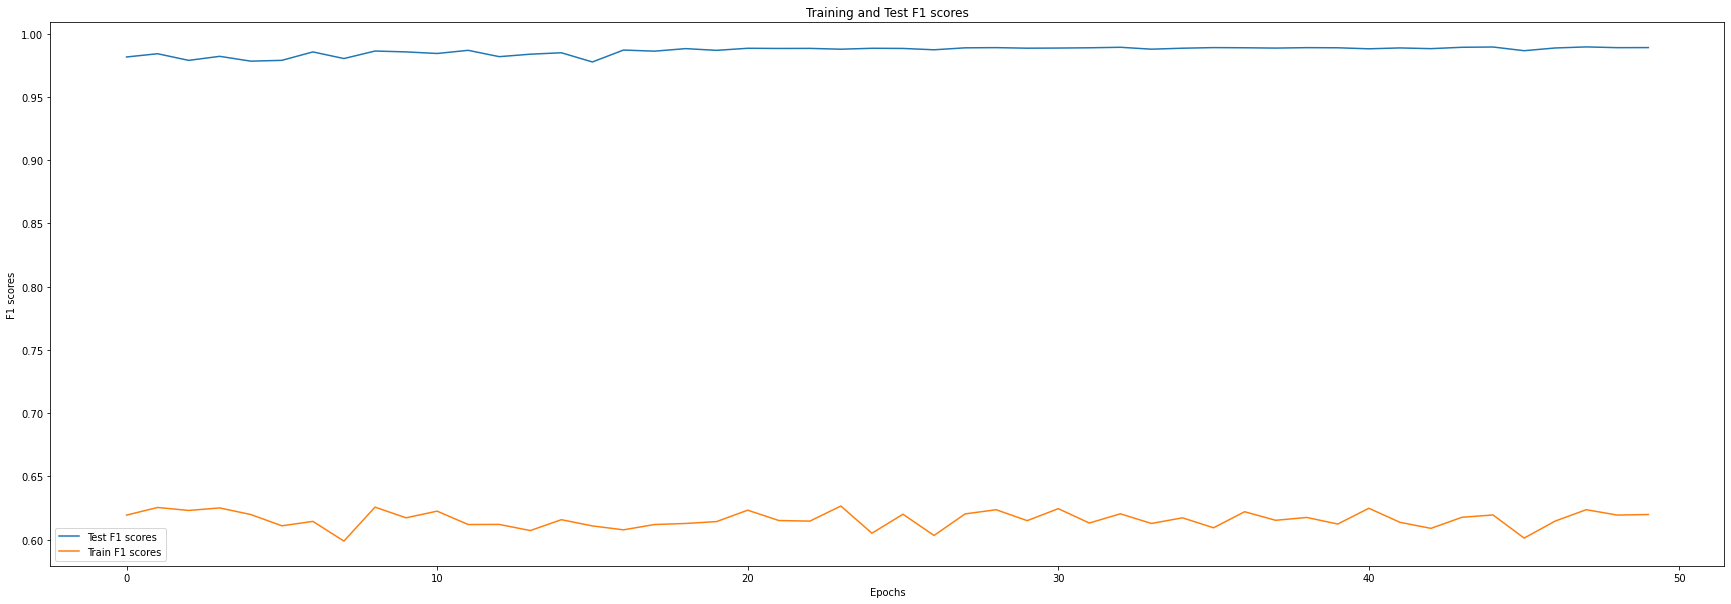

<Figure size 432x288 with 0 Axes>

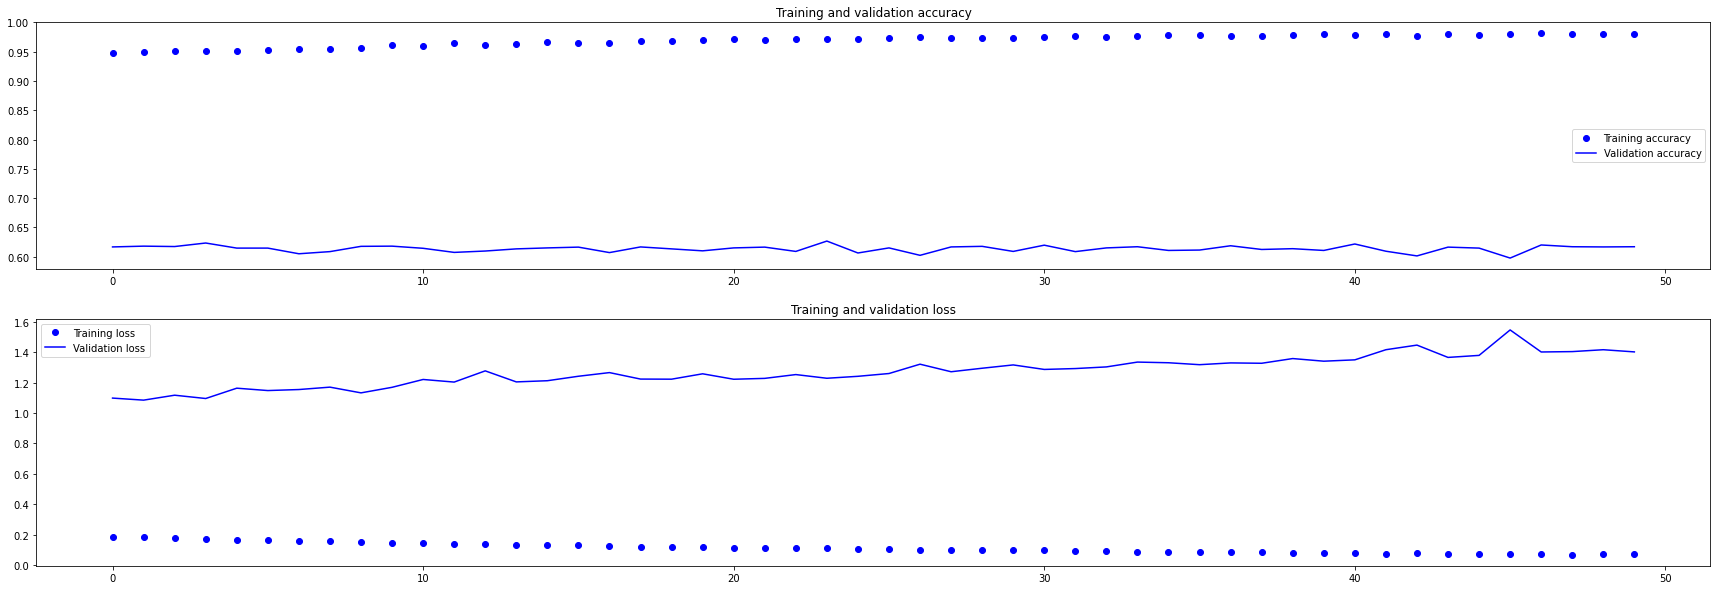

In [ ]:
show_results()
show_results1(analysis)

In [ ]:
print(max_f1_test, epoch_test)
print(max_f1_train, epoch_train)

0.62665327110695 23
0.9894664569267944 47


In [ ]:
f1scores_train = []
f1scores_test = []
max_f1_train = 0
max_f1_test = 0
epoch_train = 0
epoch_test = 0

LSTM

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
vocab_size = 10000
embedding_dim = 16
trunc_type = 'post'
padding_type = 'post'
oov_tok = "<OOV>"
training_size = 20000

In [ ]:
max_len = max([len(i.split()) for i in df.Tweet])

In [ ]:
max_len

24

In [ ]:
tokenizer = Tokenizer(oov_token = oov_tok)

In [ ]:
# len(word_index)

In [ ]:
training_sentences = df['Tweet'][:14000]
testing_sentences = df['Tweet'][14000:]
training_labels = df['Sentiment Polarity'][0:14000]
testing_labels = df['Sentiment Polarity'][14000:]

In [ ]:
tokenizer.fit_on_texts(df['Tweet'])
word_index = tokenizer.word_index
print(len(word_index))

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen = max_len, padding = padding_type, truncating = trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen = max_len, padding = padding_type, truncating = trunc_type)

21612


In [ ]:
print(len(training_sequences))
max_list = max(training_sequences, key = lambda i: len(i) )
print(max_list)
print(len(max_list))

14000
[18091, 5347, 115, 1489, 115, 5, 115, 1148, 115, 362, 115, 6768, 115, 1063, 115, 1394, 115, 41, 115, 1618, 115, 208, 115, 4073]
24


In [ ]:
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(training_labels)
label_word_index = label_tokenizer.word_index
label_seq = label_tokenizer.texts_to_sequences(training_labels)
testing_label_seq = np.array(label_tokenizer.texts_to_sequences(testing_labels))

print(label_seq)
print(label_word_index)

[[1], [1], [3], [2], [1], [2], [3], [1], [3], [1], [1], [1], [1], [2], [2], [2], [2], [3], [2], [3], [3], [2], [2], [1], [1], [3], [1], [1], [3], [2], [2], [2], [3], [2], [3], [1], [1], [1], [1], [1], [2], [3], [2], [1], [2], [1], [3], [2], [2], [2], [2], [3], [3], [3], [1], [2], [3], [1], [1], [1], [1], [3], [1], [1], [2], [2], [3], [2], [2], [1], [1], [1], [1], [1], [2], [2], [1], [2], [2], [1], [3], [2], [1], [1], [2], [1], [3], [1], [2], [3], [1], [2], [2], [3], [1], [2], [2], [2], [3], [2], [2], [3], [2], [2], [2], [1], [3], [2], [3], [1], [3], [2], [2], [1], [3], [1], [2], [3], [1], [1], [1], [2], [1], [1], [1], [1], [2], [3], [2], [1], [3], [1], [1], [1], [3], [2], [3], [1], [1], [1], [2], [1], [3], [3], [2], [1], [3], [3], [3], [3], [2], [1], [1], [2], [3], [1], [2], [3], [3], [1], [2], [3], [1], [3], [1], [2], [3], [3], [3], [2], [1], [3], [1], [3], [3], [1], [1], [1], [2], [2], [2], [3], [1], [1], [2], [1], [3], [2], [1], [3], [3], [3], [1], [1], [2], [1], [2], [2], [2], [2],

In [ ]:
# training_labels_onehot = tf.keras.utils.to_categorical(label_seq, num_classes = 3)

In [ ]:
import numpy as np
# training_padded = np.array(training_padded)
# training_labels = np.array(training_labels)
# testing_padded = np.array(testing_padded)
# testing_labels = np.array(testing_labels)
label_seq = np.array(label_seq)
testing_label_seq = np.array(testing_label_seq)

In [ ]:
len(label_seq)

14000

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(21613, embedding_dim, input_length=max_len),
    tf.keras.layers.GlobalAveragePooling1D(),
    # tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 24, 16)            345808    
_________________________________________________________________
global_average_pooling1d_3 ( (None, 16)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 24)                408       
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 75        
Total params: 346,291
Trainable params: 346,291
Non-trainable params: 0
_________________________________________________________________


In [ ]:
num_epochs = 30
history = model.fit(training_padded, label_seq, epochs=1, validation_data=(testing_padded, testing_label_seq), verbose=2)

ValueError: ignored

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")